In [45]:
import pandas as pd, numpy as np, statsmodels.api as sm

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
label = "charges"

y = df.charges
x = df[['age', 'bmi', 'children']]

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                   6.52e-262
Time:                        14:23:01   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
label = "charges"



y = df.charges
x = df[['age', 'bmi', 'children']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           8.80e-37
Time:                        14:23:01   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

In [48]:
df['predictions'] = results.fittedvalues
df

,age,sex,bmi,children,smoker,region,charges,predictions
0,19,female,27.900,0,yes,southwest,16884.92400,6908.777533
1,18,male,33.770,1,no,southeast,1725.55230,9160.977061
2,28,male,33.000,3,no,southeast,4449.46200,12390.946918
3,33,male,22.705,0,no,northwest,21984.47061,8543.527095
4,32,male,28.880,0,no,northwest,3866.85520,10354.147396
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16996.696122
1334,18,female,31.920,0,no,northeast,2205.98080,8003.758184
1335,18,female,36.850,0,no,southeast,1629.83350,9640.929171
1336,21,female,25.800,0,no,southwest,2007.94500,6691.391417


In [49]:
print(results.predict([19, 27.9, 0, 1]))  ## age, bmi, children, const

[6908.77753344]


## Improve

In [50]:
# df = pd.get_dummies(df, columns=['sex'], prefix='sex', drop_first=True)
# df = pd.get_dummies(df, columns=['smoker'], prefix='smoker', drop_first=True)
# df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)

# df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], prefix="", drop_first=True)


for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)
        
df.head()

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,6908.777533,0,1,0,0,1
1,18,33.770,1,1725.55230,9160.977061,1,0,0,1,0
2,28,33.000,3,4449.46200,12390.946918,1,0,0,1,0
3,33,22.705,0,21984.47061,8543.527095,1,0,1,0,0
4,32,28.880,0,3866.85520,10354.147396,1,0,1,0,0


In [52]:
X = df.drop(columns=[label, 'predictions']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:24:01   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

In [54]:
from sklearn import preprocessing

df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=df.columns)
df_zscore.head()

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.516418,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,-0.979564,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,-0.209640,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,-1.126745,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,-0.695149,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [56]:
y = df_zscore.charges
X = df_zscore.drop(columns=['predictions', 'charges']).assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())     ## dosen't improve

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:27:17   Log-Likelihood:                -968.66
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.2980      0.014  

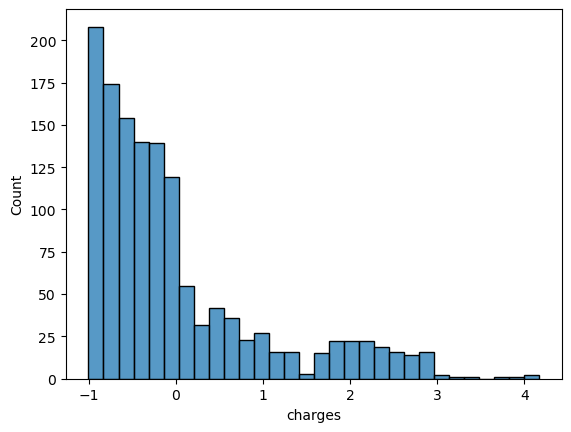

In [58]:
import seaborn as sns

sns.histplot(y);

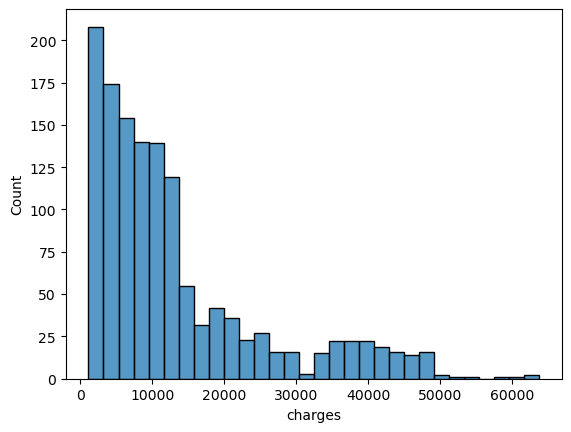

In [62]:
sns.histplot(df.charges);

In [63]:
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
df_minmax.head()

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.199302,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.306046,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.459133,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.276782,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.362598,1.0,0.0,1.0,0.0,0.0


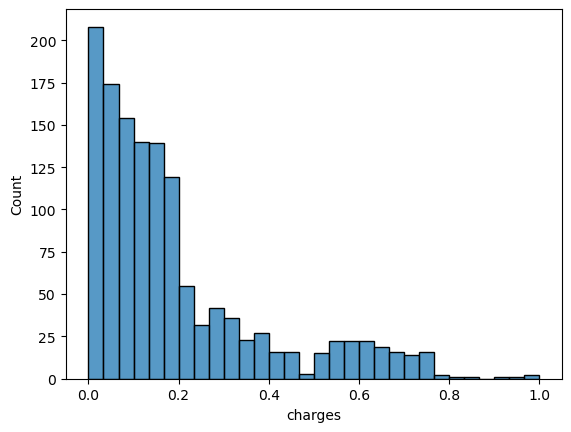

In [64]:
sns.histplot(df_minmax.charges);

In [65]:
y = df_minmax.charges
X = df_minmax.drop(columns=['predictions', 'charges']).assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.1886      0.009  

## standardization -> great for helping us compare coefficients
## But it doesn't affect our predictions, distributions

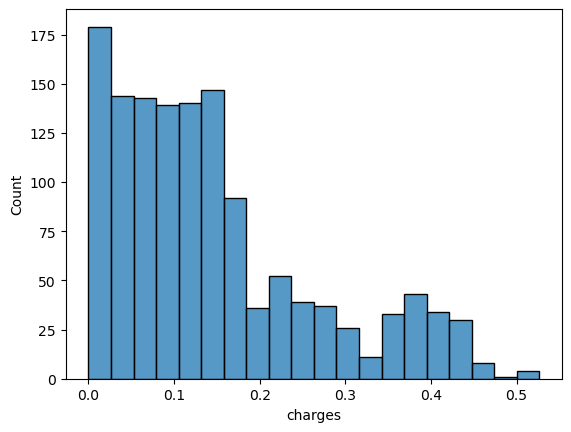

In [68]:
y = np.log1p(y)
sns.histplot(y);

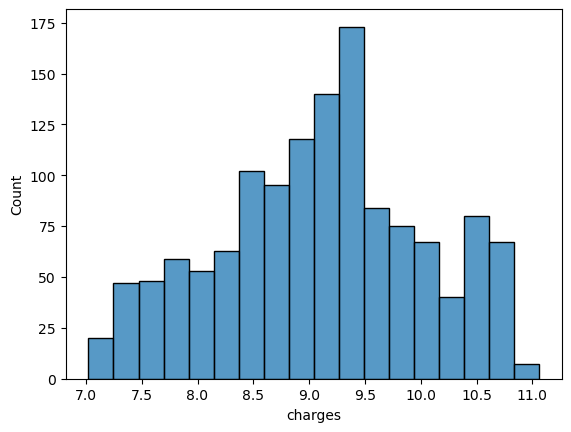

In [70]:
sns.histplot(np.log(df.charges));

In [71]:
y = np.log(df.charges)
x = df.drop(columns=['predictions', 'charges']).assign(const=1)

print(sm.OLS(y, X).fit().summary())  ## imporve

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:34:36   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  1.5908      0.040  

In [73]:
## VIF = variance infloation factor = 1 / (1 - R2)

def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    
    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}
    
    # form input data for each exogenous variable
    for col in df.drop(columns=['const']):
        y = df[col]
        X = df.drop(columns=[col])
        
        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)
        
        # calculate VIF
        if r_squared < 1:
            vif = 1/(1 - r_squared)
        else:
            vif = 100
        vif_dict[col] = vif
        
        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[col] = tolerance
        
        # generate the DataFrame to return
        df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
        
    return df_output.sort_values(by=['VIF'], ascending=False)

vif(X)

## val < 10 : adequate
## val < 5 : good
## val < 3 ideal

,VIF,Tolerance
region_southeast,1.652230,0.605243
region_southwest,1.529411,0.653846
region_northwest,1.518823,0.658405
bmi,1.106630,0.903645
age,1.016822,0.983456
smoker_yes,1.012074,0.988070
sex_male,1.008900,0.991178
children,1.004011,0.996005
